<a href="https://colab.research.google.com/github/yesin25/AbsorbanciaGrasaCarne-12TM160624/blob/main/AbsorbanciaGrasaCarne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Tratamiento de datos

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV


In [9]:
# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
#style.use('ggplot') or plt.style.use('ggplot')

In [5]:
# Configuración warnings
import warnings

In [ ]:
# El departamento de calidad de una empresa de alimentación se encarga de medir el contenido en grasa de la carne \n",
    # que comercializa. Este estudio se realiza mediante técnicas de analítica química, un proceso relativamente costoso en tiempo \n",
    # y recursos. Una alternativa que permitiría reducir costes y optimizar tiempo es emplear un espectrofotómetro \n",
    # (instrumento capaz de detectar la absorbancia que tiene un material a diferentes tipos de luz en función de sus \n",
    # características) e inferir el contenido en grasa a partir de sus medidas.
    # Antes de dar por válida esta nueva técnica, la empresa necesita comprobar qué margen de error tiene respecto al \n",
    # análisis químico. Para ello, se mide el espectro de absorbancia a 100 longitudes de onda en 215 muestras de carne, \n",
    # cuyo contenido en grasa se obtiene también por análisis químico, y se entrena un modelo con el objetivo de predecir \n",
    # el contenido en grasa a partir de los valores dados por el espectrofotómetro."

In [ ]:
# El set de datos contiene 101 columnas. Las 100 primeras, nombradas como  V1 , ...,  V100  recogen el valor de absorbancia \n",
  # para cada una de las 100 longitudes de onda analizadas (predictores), y la columna fat el contenido en grasa medido \n",
  # por técnicas químicas (variable respuesta)."

In [14]:
# Load the data
datos = pd.read_csv('/content/drive/MyDrive/Maestria URP/2024-1/Tecnicas multivariantes de los negocios/Clase 12 Regresion Ridge Lasso Absorbancia Grasa TM160624/meatspec.csv')
datos = datos.drop(columns = datos.columns[0])
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Columns: 101 entries, V1 to fat
dtypes: float64(101)
memory usage: 169.8 KB


In [15]:

# Explore the data
print(datos.head())
print(datos.info())


        V1       V2       V3       V4       V5       V6       V7       V8  \
0  2.61776  2.61814  2.61859  2.61912  2.61981  2.62071  2.62186  2.62334   
1  2.83454  2.83871  2.84283  2.84705  2.85138  2.85587  2.86060  2.86566   
2  2.58284  2.58458  2.58629  2.58808  2.58996  2.59192  2.59401  2.59627   
3  2.82286  2.82460  2.82630  2.82814  2.83001  2.83192  2.83392  2.83606   
4  2.78813  2.78989  2.79167  2.79350  2.79538  2.79746  2.79984  2.80254   

        V9      V10  ...      V92      V93      V94      V95      V96  \
0  2.62511  2.62722  ...  2.98145  2.96072  2.94013  2.91978  2.89966   
1  2.87093  2.87661  ...  3.29186  3.27921  3.26655  3.25369  3.24045   
2  2.59873  2.60131  ...  2.68951  2.67009  2.65112  2.63262  2.61461   
3  2.83842  2.84097  ...  2.97367  2.94951  2.92576  2.90251  2.87988   
4  2.80553  2.80890  ...  3.30025  3.27907  3.25831  3.23784  3.21765   

       V97      V98      V99     V100   fat  
0  2.87964  2.85960  2.83940  2.81920  22.5  
1  3.2

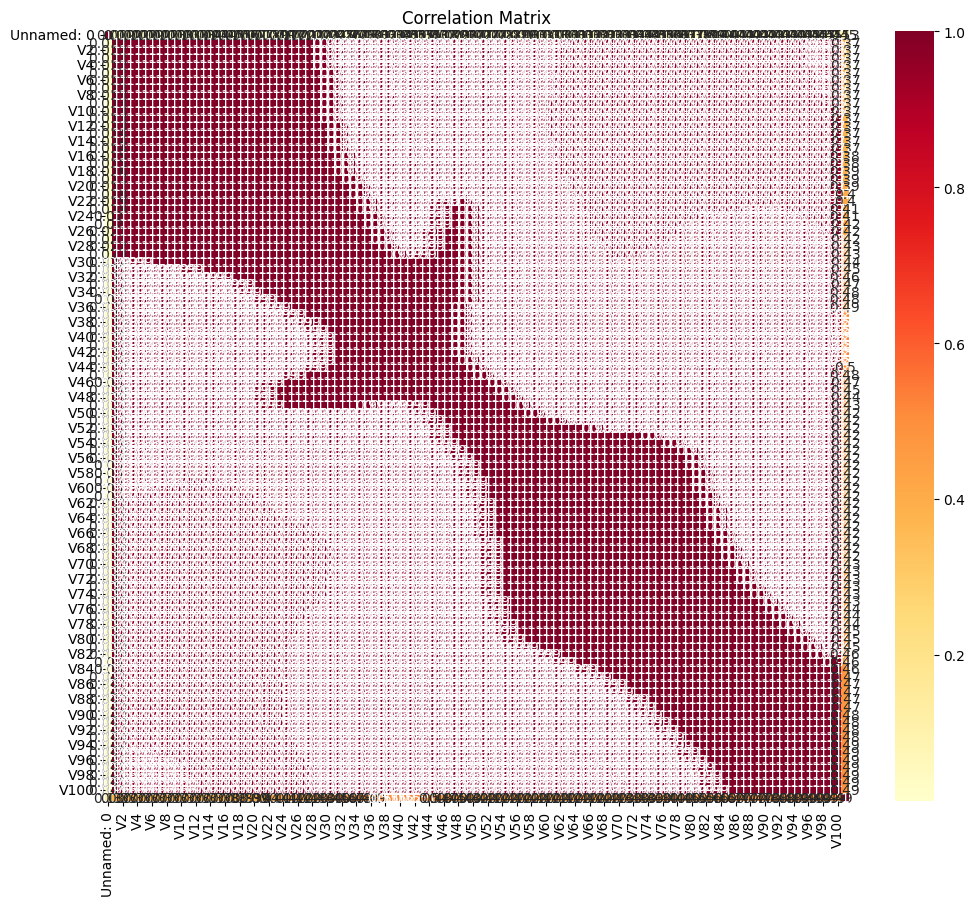

In [16]:

# Correlation analysis
corr_matrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Para el modelo lineal múltiple vamos a encontrar la relación que existe entre variables. \n",
    # Esta información es crítica a la hora de identificar cuáles pueden ser los mejores predictores para el modelo, \n",
    # y para detectar colinealidad entre predictores. \n",
    # A modo complementario, es recomendable representar la distribución de cada variable mediante histogramas."

In [19]:

# Split the data into features and target
X = datos.iloc[:, :-1]
y = datos.iloc[:, -1]

#Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Se compara el error de test (rmse) de los 4 modelos"
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression MSE: {mse_lr:.2f}')

# Train a Ridge regression model
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge:.2f}')

# Train a Lasso regression model
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso:.2f}')

# Train an Elastic Net regression model
enet = ElasticNet()
enet.fit(X_train, y_train)
y_pred_enet = enet.predict(X_test)
mse_enet = mean_squared_error(y_test, y_pred_enet)
print(f'Elastic Net Regression MSE: {mse_enet:.2f}')


Linear Regression MSE: 41.29
Ridge Regression MSE: 11.01
Lasso Regression MSE: 137.72
Elastic Net Regression MSE: 140.60
